In [1]:
# import all the libraries 

In [7]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings 
warnings.filterwarnings('ignore')

In [8]:
# import data
df = pd.read_excel("Protein_project.xlsx")
#standard_curve_concentration 
stan_cur_conc = np.array([1.5 , 1.  , 0.75, 0.5 , 0.25, 0.])

In [9]:
def import_file(df1):
    import pandas as pd
    
    from sklearn import linear_model
    import warnings 
    warnings.filterwarnings('ignore')
    df = pd.read_excel(df1)
    
    return df
import_file('Protein_project.xlsx')


,Abs,Abs1,1,2,3,4,5,6,7,8,9,10,11,12
0,A,1.5mg/ml,0.3378,0.3560,0.3359,0.2165,0.2176,0.2271,0.2085,0.2139,0.2155,0.4277,0.4549,0.4817
1,B,1.0mg/ml,0.2582,0.2608,0.2511,0.0768,0.4333,0.2961,0.2638,0.2750,0.2754,0.2528,0.2733,0.2785
2,C,0.75mg/ml,0.2219,0.2359,0.2230,0.2295,0.2888,0.3389,0.2697,0.2912,0.2903,0.2616,0.3101,0.3220
3,D,0.5mg/ml,0.1800,0.1804,0.1746,0.1833,0.2328,0.2569,0.3758,0.4581,0.4598,0.2606,0.2972,0.2948
4,E,0.25mg/ml,0.1330,0.1359,0.1320,0.2544,0.2506,0.2752,0.3208,0.4163,0.4272,0.4401,0.4775,0.5604
5,F,0mg/ml,0.0754,0.0764,0.0744,0.2735,0.2741,0.2793,0.2547,0.3042,0.3023,0.4006,0.4842,0.4853


In [10]:
def clean(df):
    
    df.drop(["Abs", "Abs1"], axis =1, inplace = True)
    return df
file = clean(import_file('Protein_project.xlsx'))

In [15]:
def stand_curve(df):
    import numpy as np
    
   
    stand_curve= df[[1,2,3]]
    return stand_curve
std_curve = stand_curve(file)   
std_curve

,1,2,3
0,0.3378,0.3560,0.3359
1,0.2582,0.2608,0.2511
2,0.2219,0.2359,0.2230
3,0.1800,0.1804,0.1746
4,0.1330,0.1359,0.1320
5,0.0754,0.0764,0.0744


[0.34323333 0.2567     0.22693333 0.17833333 0.13363333 0.0754    ]


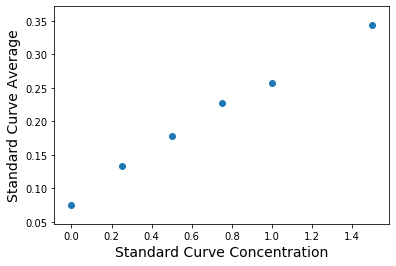

In [16]:
def standart_ave(df):
    import numpy as np
    import matplotlib.pyplot as plt
    stan_cur_conc = np.array([1.5 , 1.  , 0.75, 0.5 , 0.25, 0.])
    stand_cur_Ave = []
    for col in range(len(df)):
        mean = (df[1][col]+df[2][col]+df[3][col])/3
        stand_cur_Ave.append(mean)
    stand_cur_Ave = np.array(stand_cur_Ave)
    print(stand_cur_Ave)  
    plt.scatter(stan_cur_conc, stand_cur_Ave)
    plt.xlabel("Standard Curve Concentration", fontsize = 14)
    plt.ylabel("Standard Curve Average",fontsize = 14);
standart_ave(std_curve)

In [5]:
stand_curve= df[[1,2,3]]
stand_curve


,1,2,3
0,0.3378,0.3560,0.3359
1,0.2582,0.2608,0.2511
2,0.2219,0.2359,0.2230
3,0.1800,0.1804,0.1746
4,0.1330,0.1359,0.1320
5,0.0754,0.0764,0.0744


[0.34323333 0.2567     0.22693333 0.17833333 0.13363333 0.0754    ]


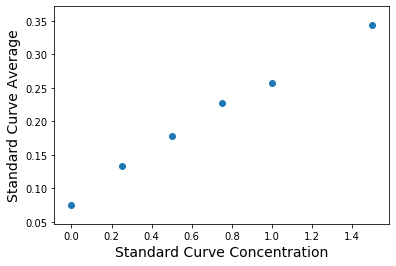

In [6]:
# calculate standart curve average
stand_cur_Ave = []
for col in range(len(stand_curve)):
    mean = (stand_curve[1][col]+stand_curve[2][col]+stand_curve[3][col])/3
    stand_cur_Ave.append(mean)
stand_cur_Ave = np.array(stand_cur_Ave)
print(stand_cur_Ave)  
plt.scatter(stan_cur_conc, stand_cur_Ave)
plt.xlabel("Standard Curve Concentration", fontsize = 14)
plt.ylabel("Standard Curve Average",fontsize = 14);

[0.34323333 0.2567     0.22693333 0.17833333 0.13363333 0.0754    ]


IndexError: invalid index to scalar variable.

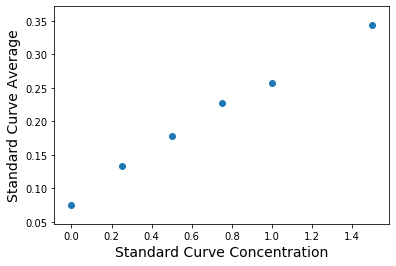

In [50]:
import numpy as np
stan_cur_conc = np.array([1.5 , 1.  , 0.75, 0.5 , 0.25, 0.])
correlation_matrix = np.corrcoef(stan_cur_conc, standart_ave(std_curve))
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

m value:  0.17474476190476185
b value:  0.08587571428571433


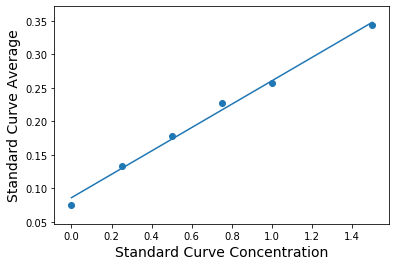

In [8]:
# fit a set of data points 
plt.scatter(stan_cur_conc, stand_cur_Ave)
m,b= np.polyfit(stan_cur_conc, stand_cur_Ave, 1)
plt.plot(stan_cur_conc,m*stan_cur_conc+b)
plt.xlabel("Standard Curve Concentration", fontsize = 14)
plt.ylabel("Standard Curve Average",fontsize = 14);
print("m value: ", m)
print("b value: " ,b)


In [9]:
#our sample
sample = df[[4,5,6]]
sample.rename(columns ={4:"measurement1",5:"measurement2",6:"measurement3"}, inplace =True)

sample1 = df[[7,8,9]]
sample1.rename(columns ={7:"measurement1",8:"measurement2",9:"measurement3"}, inplace =True)

sample2 = df[[10,11,12]]
sample2.rename(columns ={10:"measurement1",11:"measurement2",12:"measurement3"}, inplace =True)


In [10]:
our_sample = [sample, sample1, sample2]
our_sample = pd.concat(our_sample) 
our_sample

,measurement1,measurement2,measurement3
0,0.2165,0.2176,0.2271
1,0.0768,0.4333,0.2961
2,0.2295,0.2888,0.3389
3,0.1833,0.2328,0.2569
4,0.2544,0.2506,0.2752
5,0.2735,0.2741,0.2793
0,0.2085,0.2139,0.2155
1,0.2638,0.2750,0.2754
2,0.2697,0.2912,0.2903
3,0.3758,0.4581,0.4598


In [11]:
#reset index so that each sample has a unique identifier

our_sample.reset_index(drop=True, inplace = True)
our_sample.index = our_sample.index.set_names(['Sample'])

In [12]:
our_sample

,measurement1,measurement2,measurement3
Sample,,,
0,0.2165,0.2176,0.2271
1,0.0768,0.4333,0.2961
2,0.2295,0.2888,0.3389
3,0.1833,0.2328,0.2569
4,0.2544,0.2506,0.2752
5,0.2735,0.2741,0.2793
6,0.2085,0.2139,0.2155
7,0.2638,0.2750,0.2754
8,0.2697,0.2912,0.2903


In [13]:
measurement_average = []

for sample in range(len(our_sample)):
    mean = (our_sample["measurement1"][sample]+our_sample["measurement2"][sample]+our_sample["measurement3"][sample])/3
    
    measurement_average.append(mean)
measurement_average = np.array(measurement_average)
print(measurement_average)


#df1 = {"measurement_average":measurement_average,"update_dilution":update_dilution}
#pd.DataFrame(df1)

[0.2204     0.26873333 0.28573333 0.22433333 0.26006667 0.27563333
 0.21263333 0.2714     0.28373333 0.43123333 0.3881     0.28706667
 0.45476667 0.2682     0.2979     0.2842     0.49266667 0.4567    ]


In [14]:
def get_measurement_conc(y):
    protein_conc= []
    update_dilution = []
    for protein in y:
        protein_conc.append(round((protein-b)/m ,2))
        
        update_dilution.append(protein_conc*4)
        df1 = {"measurement_average":measurement_average,"protein_conc":protein_conc}
    return pd.DataFrame(df1)
get_measurement_conc(measurement_average)

,measurement_average,protein_conc
0,0.220400,0.77
1,0.268733,1.05
2,0.285733,1.14
3,0.224333,0.79
4,0.260067,1.00
5,0.275633,1.09
6,0.212633,0.73
7,0.271400,1.06
8,0.283733,1.13
9,0.431233,1.98
